In [1]:
# import libs
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score

# Prepare Data

In [2]:
# Import Data
df = pd.read_csv('creditcard.csv')

In [3]:
print(df.shape)
print(df.info())
df.head()

(284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Explore

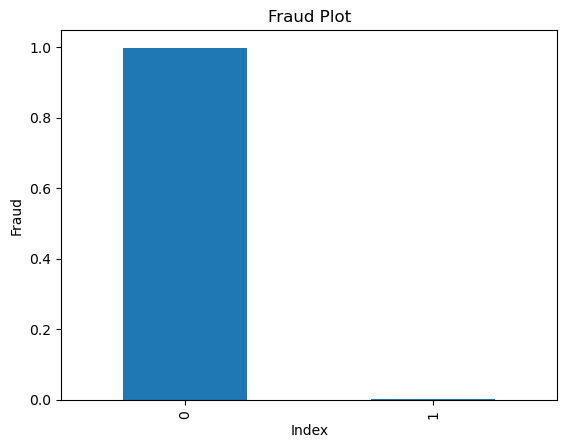

In [4]:
df['Class'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Index')
plt.ylabel('Fraud')
plt.title('Fraud Plot')
plt.show()

In [5]:
fraudpercentage = df['Class'].value_counts(normalize=True)[1] *100 
fraudpercentage

0.1727485630620034

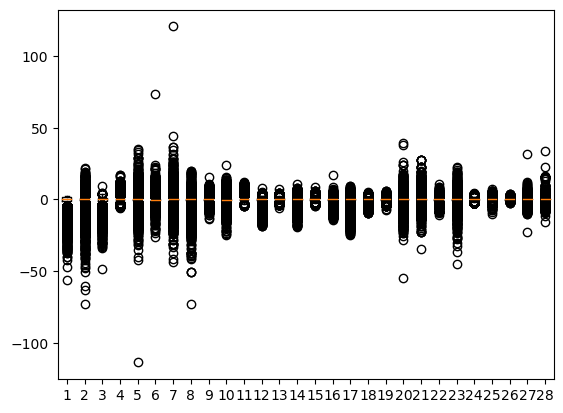

In [6]:
# Check outlireas from V1 to V28
plt.boxplot(df.drop(columns=['Class','Time','Amount']));

In [7]:
# remove outlires from V5,V6,V7,V8,V20

low, high = df["V5"].quantile([0.1, 0.9])
mask_area = df["V5"].between(low, high)
df = df[mask_area]

low, high = df["V6"].quantile([0.1, 0.9])
mask_area = df["V6"].between(low, high)
df = df[mask_area]

low, high = df["V7"].quantile([0.1, 0.9])
mask_area = df["V7"].between(low, high)
df = df[mask_area]

low, high = df["V20"].quantile([0.1, 0.9])
mask_area = df["V20"].between(low, high)
df = df[mask_area]

<Axes: >

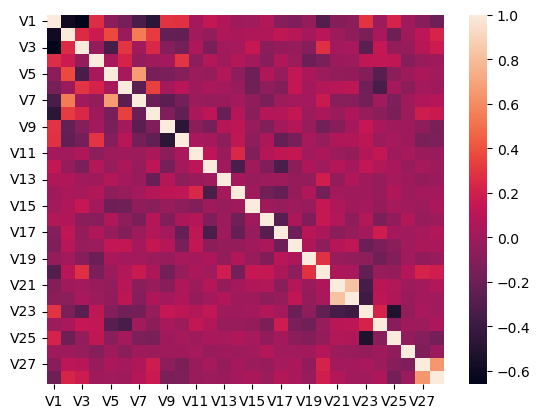

In [8]:
#Check for multicorr
corr = df.drop(columns=['Class','Time','Amount']).corr()
sns.heatmap(corr)

# Build Model 

In [9]:
# split our data to target and feautres
target ='Class'
X = df.drop(columns=target)
y = df[target]

In [10]:
# split our data to test and train
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=55)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(93324, 30)
(93324,)
(23331, 30)
(23331,)


### Baseline model 

In [11]:
y_baseline = df['Class'].value_counts(normalize=True).max()
print(f'baseline score = {y_baseline}')

baseline score = 0.9997256868543998


### Iterate

In [12]:
# build our models 
log = LogisticRegression(max_iter=150)
forest = RandomForestClassifier(random_state=42)
# fit our models
log.fit(X_train,y_train)
forest.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

### Evaluate

In [13]:
# get the prediction score for train data
print(f'The accuracy score for logistic Regression Model = {accuracy_score(y_train,log.predict(X_train))}')
print(f'The accuracy score for Randome Forest Classiefier = {accuracy_score(y_train,forest.predict(X_train))}')

The accuracy score for logistic Regression Model = 0.9996571085679996
The accuracy score for Randome Forest Classiefier = 1.0


In [14]:
# get the prediction score for test data
print(f'The accuracy score for logistic Regression Model = {accuracy_score(y_test,log.predict(X_test))}')
print(f'The accuracy score for Random Forest Classiefier = {accuracy_score(y_test,forest.predict(X_test))}')

The accuracy score for logistic Regression Model = 0.9997428314259997
The accuracy score for Random Forest Classiefier = 0.9998714157129999


In [15]:
# as you see we barly pass our baseline model
#but thats ok in these types of model our most important metrics is percesion

In [16]:
# classification report for log model
print(classification_report(y_test,log.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23328
           1       0.00      0.00      0.00         3

    accuracy                           1.00     23331
   macro avg       0.50      0.50      0.50     23331
weighted avg       1.00      1.00      1.00     23331



In [17]:
# classification report for randome forest model
print(classification_report(y_test,forest.predict(X_test),zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23328
           1       0.00      0.00      0.00         3

    accuracy                           1.00     23331
   macro avg       0.50      0.50      0.50     23331
weighted avg       1.00      1.00      1.00     23331



In [18]:
# Our precision equal One that's mean the we catch all fraud activites

## Communicate results

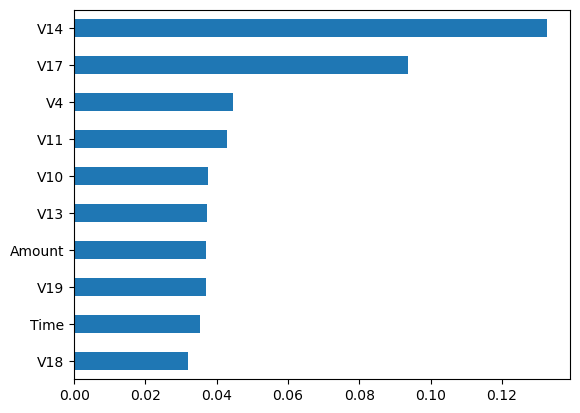

In [19]:
features = X_train.columns
# Extract importances from model
importances = forest.feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances,index=features).sort_values()
# Plot 10 most important features
feat_imp.tail(10).plot(kind='barh');